In [1]:
import os
print(os.listdir(r'C:\Users\ADMIN\Downloads'))


['.ipynb_checkpoints', 'AD3491-Fundamentals-of-Data-Science-and-Analytics-Lecture-Notes-1.pdf', 'AIDS Repository - NM Project.xlsx', 'Awesome Van Gogh Paintings Hd Download.jfif', 'Canva Setup 1.110.0.exe', 'Computer Networks - CS3591 - Notes 4.pdf', 'Computer Networks - CS3591 - Notes.pdf', 'COMPUTER NETWORKS.CN.pdf', 'CPU-Scheduling-and-Algorithm-.pdf', 'CS3591 - CN.docx', 'CS3591-Computer-Networks-Lecture-Notes-1 (1).pdf', 'CS3591-Computer-Networks-Lecture-Notes-1.pdf', 'CS3591-Computer-Networks-Lecture-Notes-2.pdf', 'Dataset .csv', 'desktop.ini', 'diabetes.csv', 'DOC-20250501-WA0003..pdf', 'Document.odt', 'DS_Record_Final.pdf', 'Fundamentals-of-Data-Science-and-Analytics-Apr-May-2024-Question-Paper-Download.pdf', 'Git-2.49.0-64-bit.exe', 'GitHubDesktopSetup-x64.exe', 'Green Beige  Minimalist Ebook Leadmagnet Workbook.pdf', 'jdk-21_windows-x64_bin.exe', 'MA3391-Probability-and-Statistics-Apr-May-2024-Question-Paper-Download.pdf', 'Machine Learning Internship Task  (1).pdf', 'Machine

In [2]:
import pandas as pd

df = pd.read_csv(r'C:\Users\ADMIN\Downloads\Dataset .csv')
print(df.head())


   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [3]:
df["Primary Cuisine"] = (
    df["Cuisines"]
      .astype(str)                # guard against NaNs
      .str.split(",")             # “North Indian, Chinese”
      .str[0]                     # keep first tag
      .str.strip()
)


In [4]:
major = df["Primary Cuisine"].value_counts()
keep  = major[major >= 50].index       # ≥ 50 examples each
df    = df[df["Primary Cuisine"].isin(keep)].copy()


In [5]:
feature_cols = [
    "Country Code", "City", "Longitude", "Latitude",
    "Average Cost for two", "Currency",
    "Has Table booking", "Has Online delivery", "Is delivering now",
    "Price range", "Aggregate rating", "Votes"
]
X, y = df[feature_cols], df["Primary Cuisine"]


In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

num_cols  = X.select_dtypes(exclude="object").columns
cat_cols  = X.select_dtypes(include ="object").columns

numeric_tf = Pipeline([
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_tf = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot",  OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_tf, num_cols),
    ("cat", categorical_tf, cat_cols)
])


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)


In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression       # choose any classifier you like
from sklearn.metrics import accuracy_score, classification_report

# --- 1. Pre‑processing blocks -------------------------------------------------
num_cols = X.select_dtypes(exclude="object").columns
cat_cols = X.select_dtypes(include="object").columns

numeric_tf = Pipeline([
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_tf = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot",  OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_tf, num_cols),
    ("cat", categorical_tf, cat_cols)
])

# --- 2. Train‑test split ------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# --- 3. Build the full pipeline (PREP + MODEL) -------------------------------
clf = Pipeline([
    ("prep",  preprocessor),                 # your ColumnTransformer
    ("model", LogisticRegression(max_iter=2000, n_jobs=-1))
])

# --- 4. Fit, predict, evaluate -----------------------------------------------
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(classification_report(y_test, y_pred, zero_division=0))


Accuracy: 0.339
              precision    recall  f1-score   support

    American       0.39      0.48      0.43        56
       Asian       0.00      0.00      0.00        15
      Bakery       0.00      0.00      0.00       124
   Beverages       0.00      0.00      0.00        16
     Biryani       0.00      0.00      0.00        22
      Burger       0.00      0.00      0.00        23
        Cafe       0.14      0.06      0.08       124
     Chinese       0.00      0.00      0.00       171
 Continental       0.06      0.02      0.03        47
    Desserts       0.00      0.00      0.00        30
    European       0.00      0.00      0.00        12
   Fast Food       0.00      0.00      0.00       135
 Finger Food       0.00      0.00      0.00        16
Healthy Food       0.00      0.00      0.00        11
   Ice Cream       0.00      0.00      0.00        36
      Indian       0.26      0.50      0.34        10
     Italian       0.03      0.02      0.02        47
    Japanes

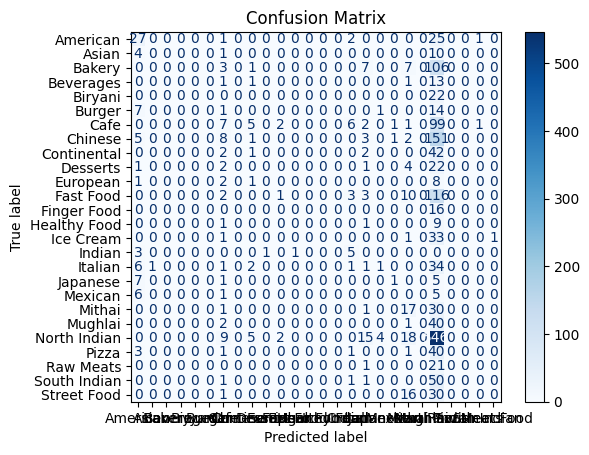

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


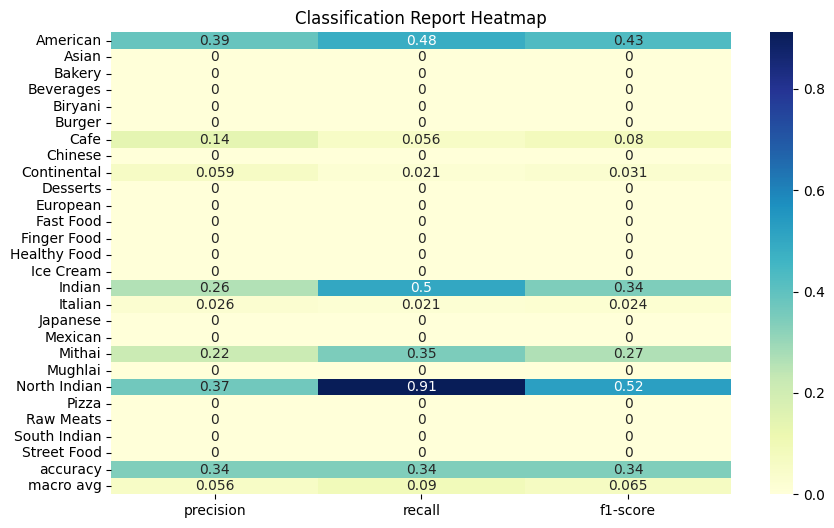

In [10]:
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="YlGnBu")  # exclude 'accuracy' row/column
plt.title("Classification Report Heatmap")
plt.show()
